In [56]:
%matplotlib inline

In [45]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [36]:
def gen_traj(vx, vy, ymin):
    x = 0
    y = 0
    data = list()
    data.append([x, y])
    while y > ymin:
        x += vx
        y += vy
        data.append([x, y])
        if vx > 0:
            vx -= 1
        elif vx < 0:
            vx += 1
        vy -= 1
    return np.array(data)

gen_traj(6, 9, -20)

array([[  0,   0],
       [  6,   9],
       [ 11,  17],
       [ 15,  24],
       [ 18,  30],
       [ 20,  35],
       [ 21,  39],
       [ 21,  42],
       [ 21,  44],
       [ 21,  45],
       [ 21,  45],
       [ 21,  44],
       [ 21,  42],
       [ 21,  39],
       [ 21,  35],
       [ 21,  30],
       [ 21,  24],
       [ 21,  17],
       [ 21,   9],
       [ 21,   0],
       [ 21, -10],
       [ 21, -21]])

In [67]:
@dataclass
class Box:
    xmin: int
    xmax: int
    ymin: int
    ymax: int
        
    def __post_init__(self):
        self.h = self.ymax - self.ymin
        self.w = self.xmax - self.xmin
        
    def as_rect(self, **args):
        return Rectangle((self.xmin, self.ymin), self.w, self.h, **args)
        
test = Box(20, 30, -10, -5)
print(test)
print(test.as_rect())

Box(xmin=20, xmax=30, ymin=-10, ymax=-5)
Rectangle(xy=(20, -10), width=10, height=5, angle=0)


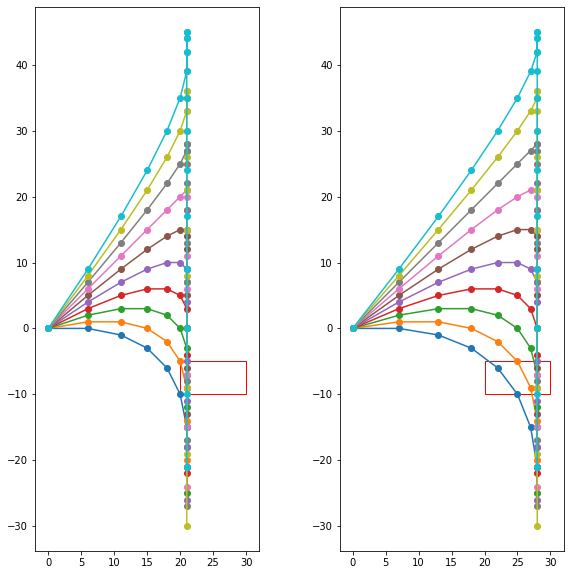

In [69]:
def plot_traj(ax, t, label=""):
    ax.plot(t[:,0], t[:,1], '-o')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

for vx, ax in zip([6, 7], [ax1, ax2]):
    ax.set(xlim=(-2, 32))
    ax.set_aspect('equal', 'box')
    ax.add_patch(test.as_rect(edgecolor='red', fill=False))

    for vy in range(10):
        plot_traj(ax, gen_traj(vx, vy, -20))

plt.show()

In [145]:
def find_max_height(box):
    vy = 1
    max_height = 0
    while vy <= 200:
        t = gen_traj(0, vy, box.ymin)
        ty = t[:,1]
        in_box = np.count_nonzero(np.logical_and(ty >= box.ymin, ty <= box.ymax))
        #print(vy, in_box, max(ty))
        if in_box > 0 and max(ty) > max_height:
            max_height = max(ty)
        vy += 1
    return max_height

find_max_height(test)

45

In [146]:
inp = Box(102, 157, -146, -90)
find_max_height(inp)

10585

In [116]:
def intersect(vx, vy, box):
    t = gen_traj(vx, vy, box.ymin)
    tx = t[:,0]
    ty = t[:,1]
    return np.count_nonzero(np.logical_and(
        np.logical_and(tx >= box.xmin, tx <= box.xmax),
        np.logical_and(ty >= box.ymin, ty <= box.ymax)
    ))

print(intersect(0, 9, test))
print(intersect(6, 9, test))

0
1


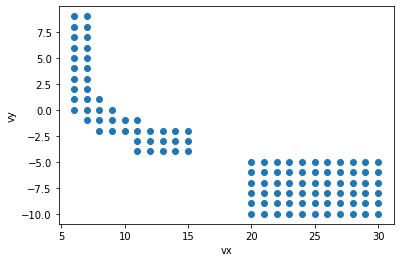

In [148]:
def brute_force_test(box, vxmax, vymin, vymax):
    d = []
    for vx in range(1, vxmax+1):
        for vy in range(vymin, vymax+1):
            if intersect(vx, vy, box) > 0:
                d.append([vx, vy])
    
    return np.array(d, dtype=int)

test_vs = brute_force_test(test, 30, -10, 100)
plt.scatter(test_vs[:,0], test_vs[:,1])
plt.xlabel("vx")
plt.ylabel("vy")
plt.show()

In [142]:
test_vs.shape[0]

112

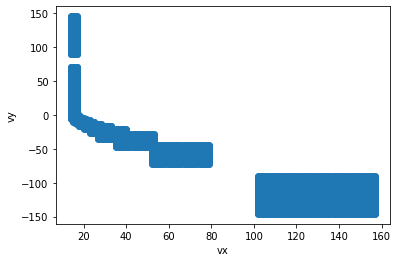

In [149]:
inp_vs = brute_force_test(inp, inp.xmax, inp.ymin, 150)
plt.scatter(inp_vs[:,0], inp_vs[:,1])
plt.xlabel("vx")
plt.ylabel("vy")
plt.show()

In [144]:
inp_vs.shape[0]

5247